In [1]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

In [2]:
label_not_independent = np.load('label_not_independent.npy')
label_independent = np.load('label_independent.npy')


In [3]:
ic(np.unique(label_not_independent, return_counts=True))
ic(np.unique(label_independent, return_counts=True))


ic| np.unique(label_not_independent, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                           array([205973062,   3987699, 116377619], dtype=int64))
ic| np.unique(label_independent, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                       array([206151096,   4259440, 115927844], dtype=int64))


(array([0, 1, 2], dtype=uint8),
 array([206151096,   4259440, 115927844], dtype=int64))

In [4]:
import skimage
def getSeparateLabelsForClasses1And2(label):

    label_class1 = label.copy()
    label_class1[label_class1 == 2] = 0

    label_class2 = label.copy()
    label_class2[label_class2 == 1] = 0
    label_class2[label_class2 == 2] = 1
    return label_class1, label_class2
def removeBorderBufferFromLabel(label, borderBuffer):
    # Creation of border buffer for pixels not considered

    label_class1, label_class2 = getSeparateLabelsForClasses1And2(label)
    image_ref_ = label_class1.copy()
    im_dilate = skimage.morphology.dilation(image_ref_, skimage.morphology.disk(borderBuffer))
    im_erosion = skimage.morphology.erosion(image_ref_, skimage.morphology.disk(borderBuffer))
    inner_buffer = image_ref_ - im_erosion
    inner_buffer[inner_buffer == 1] = 2
    outer_buffer = im_dilate-image_ref_
    outer_buffer[outer_buffer == 1] = 2
    
    # 1 deforestation, 2 unknown
    image_ref_[outer_buffer + inner_buffer == 2 ] = 2

    image_ref_[label_class2 == 1] = 2
    return image_ref_   

In [5]:
label_not_independent.shape

(17730, 9203, 2)

In [6]:
# 
# borderBuffer = 1
# if borderBuffer > 0:
# 	label_independent[...,1] = removeBorderBufferFromLabel(label_independent[...,1], borderBuffer)

(-0.5, 9202.5, 17729.5, -0.5)

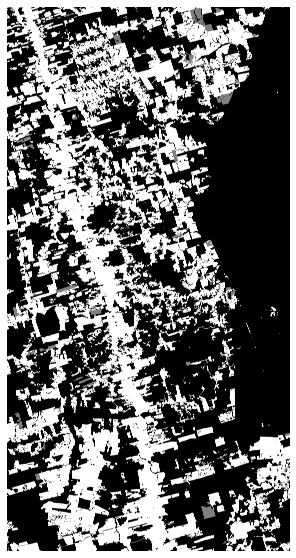

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(label_not_independent[...,1], cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

(-0.5, 9202.5, 17729.5, -0.5)

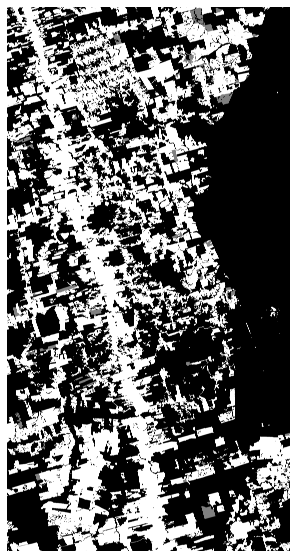

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(label_independent[...,1], cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [9]:
difference_label = label_not_independent[...,1].astype(np.int8) - label_independent[...,1].astype(np.int8)
np.save('difference_label.npy', difference_label)

In [10]:
np.unique(difference_label, return_counts=True)

(array([0, 1, 2], dtype=int8),
 array([162957103,    131351,     80736], dtype=int64))

(-0.5, 9202.5, 17729.5, -0.5)

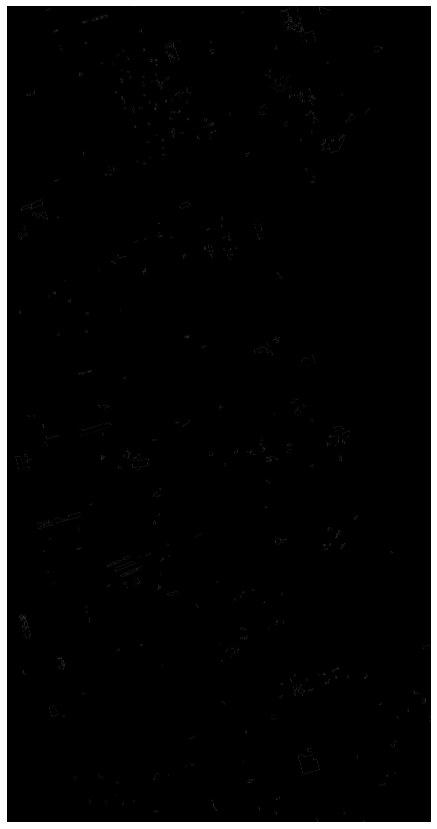

In [11]:

plt.figure(figsize=(15,15))
plt.imshow(difference_label, cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')

# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

(-0.5, 9202.5, 17729.5, -0.5)

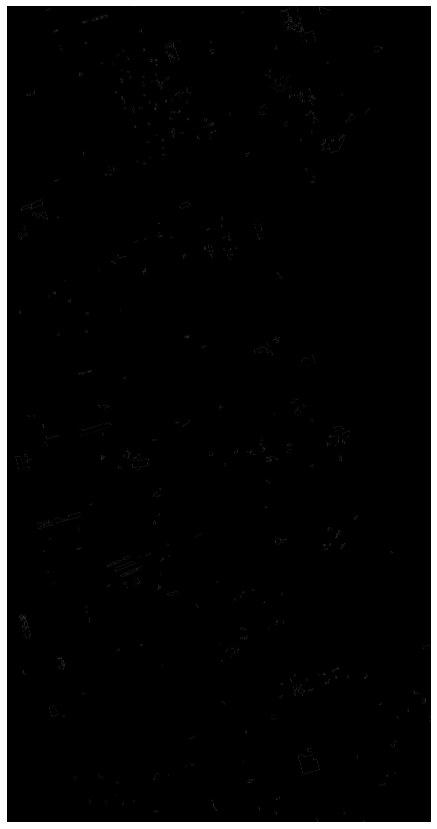

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(np.abs(label_not_independent[...,1].astype(np.int8) - label_independent[...,1].astype(np.int8)), 
    cmap=plt.cm.gray)
# title_name = 'ResUnet'
plt.axis('off')

In [13]:
ic(np.unique(label_not_independent[...,1], return_counts=True))
ic(np.unique(label_independent[...,1], return_counts=True))


ic| np.unique(label_not_independent[...,1], return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                                  array([101968255,   1921763,  59279172], dtype=int64))
ic| np.unique(label_independent[...,1], return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                              array([102048991,   2053114,  59067085], dtype=int64))


(array([0, 1, 2], dtype=uint8),
 array([102048991,   2053114,  59067085], dtype=int64))

In [14]:
past_deforestation_not_independent = label_not_independent[...,1].copy()
past_deforestation_not_independent[past_deforestation_not_independent == 1] = 0
past_deforestation_not_independent[past_deforestation_not_independent == 2] = 1

past_deforestation_independent = label_independent[...,1].copy()
past_deforestation_independent[past_deforestation_independent == 1] = 0
past_deforestation_independent[past_deforestation_independent == 2] = 1

ic(np.unique(past_deforestation_not_independent, return_counts = True))
ic(np.unique(past_deforestation_independent, return_counts = True))


ic| np.unique(past_deforestation_not_independent, return_counts = True): (array([0, 1], dtype=uint8), array([103890018,  59279172], dtype=int64))
ic| np.unique(past_deforestation_independent, return_counts = True): (array([0, 1], dtype=uint8), array([104102105,  59067085], dtype=int64))


(array([0, 1], dtype=uint8), array([104102105,  59067085], dtype=int64))

In [15]:
difference_past_deforestation = np.abs(
    past_deforestation_not_independent.astype(np.int8)-past_deforestation_independent.astype(np.int8))
ic(np.unique(difference_past_deforestation, return_counts = True))

ic| np.unique(difference_past_deforestation, return_counts = True): (array([0, 1], dtype=int8), array([162957103,    212087], dtype=int64))


(array([0, 1], dtype=int8), array([162957103,    212087], dtype=int64))

(-0.5, 9202.5, 17729.5, -0.5)

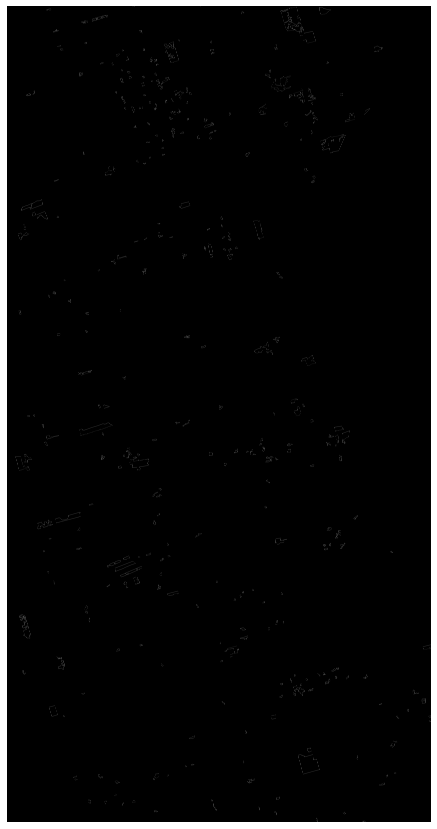

In [16]:

plt.figure(figsize=(15,15))
plt.imshow(difference_past_deforestation, cmap=plt.cm.gray)
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

(-0.5, 9202.5, 17729.5, -0.5)

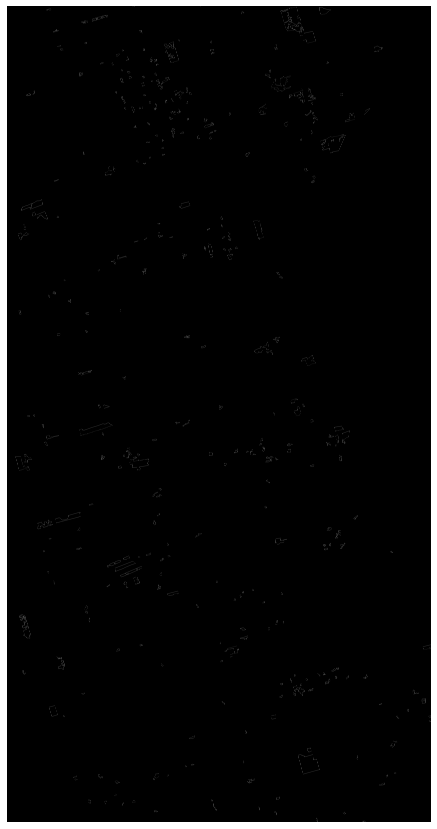

In [17]:

plt.figure(figsize=(15,15))
plt.imshow(past_deforestation_not_independent.astype(np.int8)-past_deforestation_independent.astype(np.int8), 
    cmap=plt.cm.gray)
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')

In [18]:
current_deforestation_not_independent = label_not_independent[...,1].copy()
current_deforestation_not_independent[current_deforestation_not_independent == 2] = 0

current_deforestation_independent = label_independent[...,1].copy()
current_deforestation_independent[current_deforestation_independent == 2] = 0

ic(np.unique(current_deforestation_not_independent, return_counts = True))
ic(np.unique(current_deforestation_independent, return_counts = True))


ic| np.unique(current_deforestation_not_independent, return_counts = True): (array([0, 1], dtype=uint8), array([161247427,   1921763], dtype=int64))
ic| np.unique(current_deforestation_independent, return_counts = True): (array([0, 1], dtype=uint8), array([161116076,   2053114], dtype=int64))


(array([0, 1], dtype=uint8), array([161116076,   2053114], dtype=int64))

In [19]:
difference_current_deforestation = np.abs(
    current_deforestation_not_independent.astype(np.int8)-current_deforestation_independent.astype(np.int8))
ic(np.unique(difference_current_deforestation, return_counts = True))

ic| np.unique(difference_current_deforestation, return_counts = True): (array([0, 1], dtype=int8), array([163037839,    131351], dtype=int64))


(array([0, 1], dtype=int8), array([163037839,    131351], dtype=int64))

(-0.5, 9202.5, 17729.5, -0.5)

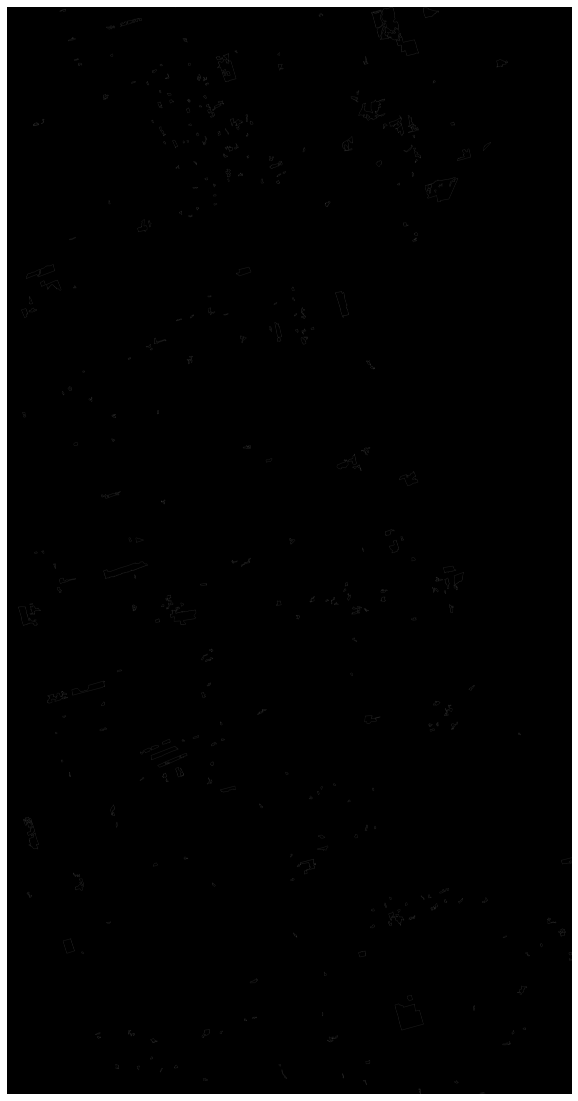

In [20]:

plt.figure(figsize=(20,20))
plt.imshow(difference_current_deforestation, cmap=plt.cm.gray)
plt.axis('off')
# plt.savefig('figures/Para' + title_name + ' error mask.png', dpi=150, bbox_inches='tight')